# Decaimiento radioactivo

Muestra que un proceso sin memoria como un decaimiento de un radioisótopo origina una distribución exponencial.
La variable aleatoria es el tiempo de vida de un radioisótopo.

In [1]:
import numpy as np
rng = np.random.default_rng(seed=6870)

Comenzamos con un número inicial de partículas: 

In [2]:
nparticles = 100000

Tiempo de vida medio del radioisótopo:

In [3]:
tau = 1

Intervalo de tiempo para los pasos discretos de la simulación 

In [4]:
delta_time = tau / 100

Probabilidad de decaimiento del radioisótopo en un intervalo temporal:

In [5]:
decay_probability_step = delta_time / tau
decay_probability_step

0.01

El intervalo debe ser mucho menor que el tiempo de vida media de manera que la probabilidad de decaimiento en un intervalo sea pequeña. De esta forma el proceso discreto aproxima bien al caso continuo.

## Simulación del proceso radioactivo

La simulación itera sobre pasos temporales. Empieza por el número de partículas iniciales. En cada paso calcula el número de partículas que decaen. Por otro lado lleva la cuenta de las partículas sobrevivientes. Es interrumpe la simulación cuando quedan pocas partículas sobrevivientes con respecto a las iniciales.   

In [6]:
from scipy.stats import uniform
# Initialize the number of survivors with the initial number of particles 
nsurvivors = nparticles
# List of decaying particles in each step
ndecays_list = []
# Number of survivors to stop the simulation
nsurvivors_stop = nparticles / 1000
while True:
    # Generate a uniform variable between 0 and 1 for all survivors of the previous step    
    decay_data = uniform.rvs(size = nsurvivors, random_state=rng)
    # A particle decays if its decay data is less than the decay probability of a step 
    decay_particles = decay_data < decay_probability_step
    # Count the number of decays in this step
    ndecays_step = decay_particles.sum()
    # Add the number of decays in this step to the list of decays
    ndecays_list.append(ndecays_step)
    # Calculate the number of survivors after the current step
    nsurvivors -= ndecays_step
    # Break if there are fewer survivors than the threshold
    if nsurvivors < nsurvivors_stop:
        break

Histograma de densidad del tiempo de vida calculado a partir de la simulación Monte Carlo 

In [7]:
# Convert list to numpy.array to calculate stuff afterward 
ndecays_array = np.array(ndecays_list)
scale_factor = nparticles * delta_time
density = ndecays_array / scale_factor

In [8]:
ndecays_array

array([ 988, 1027,  987,  982,  984,  958,  971,  872,  952,  956,  911,
        861,  917,  855,  860,  896,  836,  874,  854,  796,  823,  820,
        800,  812,  769,  750,  759,  738,  763,  716,  804,  745,  735,
        707,  750,  745,  651,  717,  683,  684,  630,  661,  632,  609,
        648,  647,  650,  627,  600,  612,  618,  598,  556,  589,  589,
        594,  551,  545,  561,  535,  596,  507,  559,  530,  516,  499,
        532,  537,  477,  476,  496,  469,  499,  474,  471,  499,  434,
        494,  453,  437,  440,  420,  443,  443,  407,  458,  397,  429,
        410,  428,  379,  414,  381,  389,  373,  414,  372,  386,  372,
        323,  346,  384,  360,  374,  364,  352,  369,  327,  331,  331,
        342,  365,  313,  346,  362,  290,  311,  270,  289,  315,  292,
        318,  258,  256,  264,  283,  322,  268,  277,  249,  252,  266,
        273,  264,  262,  289,  261,  233,  245,  259,  249,  234,  265,
        239,  238,  252,  239,  201,  219,  211,  1

In [9]:
scale_factor

1000.0

In [10]:
density

array([9.880e-01, 1.027e+00, 9.870e-01, 9.820e-01, 9.840e-01, 9.580e-01,
       9.710e-01, 8.720e-01, 9.520e-01, 9.560e-01, 9.110e-01, 8.610e-01,
       9.170e-01, 8.550e-01, 8.600e-01, 8.960e-01, 8.360e-01, 8.740e-01,
       8.540e-01, 7.960e-01, 8.230e-01, 8.200e-01, 8.000e-01, 8.120e-01,
       7.690e-01, 7.500e-01, 7.590e-01, 7.380e-01, 7.630e-01, 7.160e-01,
       8.040e-01, 7.450e-01, 7.350e-01, 7.070e-01, 7.500e-01, 7.450e-01,
       6.510e-01, 7.170e-01, 6.830e-01, 6.840e-01, 6.300e-01, 6.610e-01,
       6.320e-01, 6.090e-01, 6.480e-01, 6.470e-01, 6.500e-01, 6.270e-01,
       6.000e-01, 6.120e-01, 6.180e-01, 5.980e-01, 5.560e-01, 5.890e-01,
       5.890e-01, 5.940e-01, 5.510e-01, 5.450e-01, 5.610e-01, 5.350e-01,
       5.960e-01, 5.070e-01, 5.590e-01, 5.300e-01, 5.160e-01, 4.990e-01,
       5.320e-01, 5.370e-01, 4.770e-01, 4.760e-01, 4.960e-01, 4.690e-01,
       4.990e-01, 4.740e-01, 4.710e-01, 4.990e-01, 4.340e-01, 4.940e-01,
       4.530e-01, 4.370e-01, 4.400e-01, 4.200e-01, 

Calculamos los centros de los bines del histograma de densidad a partir de los pasos de la simulación 

In [11]:
nsteps = density.size
time = (np.arange(nsteps) +  0.5) * delta_time
time

array([5.000e-03, 1.500e-02, 2.500e-02, 3.500e-02, 4.500e-02, 5.500e-02,
       6.500e-02, 7.500e-02, 8.500e-02, 9.500e-02, 1.050e-01, 1.150e-01,
       1.250e-01, 1.350e-01, 1.450e-01, 1.550e-01, 1.650e-01, 1.750e-01,
       1.850e-01, 1.950e-01, 2.050e-01, 2.150e-01, 2.250e-01, 2.350e-01,
       2.450e-01, 2.550e-01, 2.650e-01, 2.750e-01, 2.850e-01, 2.950e-01,
       3.050e-01, 3.150e-01, 3.250e-01, 3.350e-01, 3.450e-01, 3.550e-01,
       3.650e-01, 3.750e-01, 3.850e-01, 3.950e-01, 4.050e-01, 4.150e-01,
       4.250e-01, 4.350e-01, 4.450e-01, 4.550e-01, 4.650e-01, 4.750e-01,
       4.850e-01, 4.950e-01, 5.050e-01, 5.150e-01, 5.250e-01, 5.350e-01,
       5.450e-01, 5.550e-01, 5.650e-01, 5.750e-01, 5.850e-01, 5.950e-01,
       6.050e-01, 6.150e-01, 6.250e-01, 6.350e-01, 6.450e-01, 6.550e-01,
       6.650e-01, 6.750e-01, 6.850e-01, 6.950e-01, 7.050e-01, 7.150e-01,
       7.250e-01, 7.350e-01, 7.450e-01, 7.550e-01, 7.650e-01, 7.750e-01,
       7.850e-01, 7.950e-01, 8.050e-01, 8.150e-01, 

PDF exponencial con parámetro de escala igual al tiempo de decaimiento medio usado en la simulación

In [12]:
from scipy.stats import expon
x_pdf = np.linspace(start=0, stop=time.max(), num=100)
y_pdf = expon.pdf(x_pdf, scale=tau) 

Plot de los datos simulados y la PDF exponencial

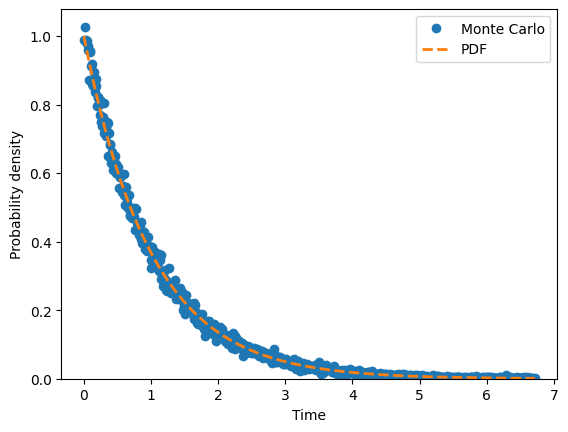

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Probability density")
ax.plot(time, density, ls='None', marker='o', label="Monte Carlo")
ax.plot(x_pdf, y_pdf, ls='--', lw=2, label="PDF")
ax.set_ylim(bottom=0)
ax.legend()